In [2]:
import numpy as np
x = np.array(range(5))
y = np.array(range(5), dtype='float32')
w = y.copy()[:, np.newaxis] #1D to 2D col vector
v = y.copy()[np.newaxis, :] #1D to 2D row vector
z = np.array([range(i,i+4) for i in [1,2,3]])
rnd = np.random.randint(0,100,size=100)
print(x,y)
print(z)
print(w,v)
print(x.shape)
print(x[np.newaxis, :].shape)
print(x.reshape(5,1).shape)
print(rnd)

[0 1 2 3 4] [0. 1. 2. 3. 4.]
[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]] [[0. 1. 2. 3. 4.]]
(5,)
(1, 5)
(5, 1)
[42 59 93 59 68 63 63 88 66 60 76 96 89 66 98 11 32 10 98 83 37 41 26 83
 60 10 56 14 76 11  3 45 75 50 52 30  3  7 74 96  0 13 20 41 41 48 23 23
  6 98 56 97 66 83 38  9 46 38 91 64  8 33 41 98 73 54 69 74  9 78 62 27
 52 70 14  9 59 57  4 68 88 89 82 81  1 85  5 24 93 37 42  2 10 76 94 46
 54  8 11 93]


In [3]:
a = np.zeros((2,2), dtype='int')
b = np.ones((4,3), dtype='float')
c = np.full((3,3), 3.14)
print(a)
print(b)
print(c)

[[0 0]
 [0 0]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[3.14 3.14 3.14]
 [3.14 3.14 3.14]
 [3.14 3.14 3.14]]


In [4]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
names = np.array(data['name'])
print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Smallest President: ", names[np.argmin(heights)])
print("Maximum height: ", heights.max())
print("Tallest President: ", names[np.argmax(heights)])
print()
print("25th percentile: ", np.percentile(heights, 25))
print("Median:          ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Smallest President:  James Madison
Maximum height:  193
Tallest President:  Abraham Lincoln

25th percentile:  174.25
Median:           182.0
75th percentile:  183.0


Text(0, 0.5, 'Frequency')

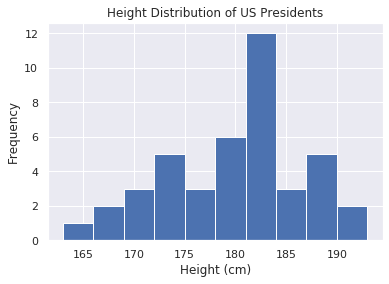

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

[-5.55111512e-17  6.66133815e-17  2.22044605e-17]


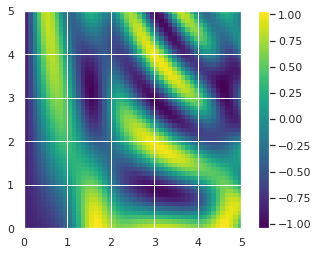

In [6]:
X = np.random.random((10,3))
Xmean = X.mean(0)
Xcentred = X - Xmean
print(Xcentred.mean(0))

###

# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 * np.cos(y) + np.cos(10 + y * x) * np.cos(x)

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

(365,)
Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


Text(0, 0.5, 'Frequency')

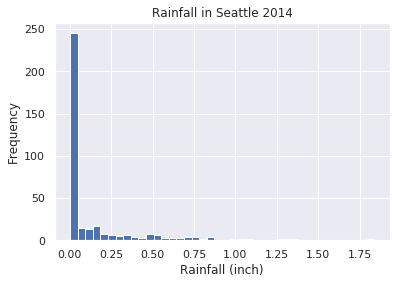

In [7]:
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
print(inches.shape)
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) & (inches < 0.2)))
plt.hist(inches, 40);
plt.title('Rainfall in Seattle 2014')
plt.xlabel('Rainfall (inch)')
plt.ylabel('Frequency')


In [8]:
# construct a mask of all rainy days
rainy = (inches > 0)
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


(100, 2)
(20, 2)


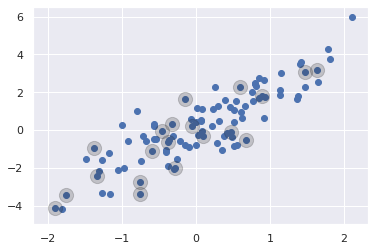

In [23]:
import seaborn; seaborn.set() # for plot styling
mean = [0, 0]
cov = [[1, 2],
        [2, 5]]
rng = np.random.RandomState(42)
X = rng.multivariate_normal(mean, cov, 100)
print(X.shape)

#Choose 20 random points
indices = np.random.choice(X.shape[0], 20, replace=False)
selection = X[indices]
print(selection.shape)

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(selection[:, 0], selection[:, 1], facecolor='k', s=200, alpha=0.2);

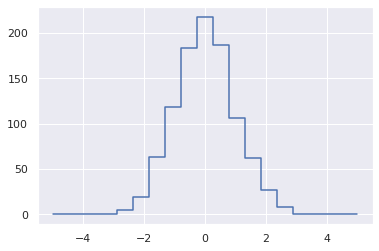

In [41]:
np.random.seed(42)
x = np.random.randn(1000)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins) #Return an array of zeros with the same shape and type as a given array
#print(x)
# find the appropriate bin for each x
i = np.searchsorted(bins, x)
# add 1 to each of these bins
np.add.at(counts, i, 1)

plt.plot(bins, counts, drawstyle='steps');
#plt.hist(x, bins, histtype='step');

In [43]:
X = rng.randint(0, 10, (4, 6))
print(X)
print(np.sort(X, axis=0))
print(np.sort(X, axis=1))

[[3 8 5 2 0 3]
 [8 2 8 6 3 2]
 [9 4 4 2 8 3]
 [4 3 4 6 8 6]]
[[3 2 4 2 0 2]
 [4 3 4 2 3 3]
 [8 4 5 6 8 3]
 [9 8 8 6 8 6]]
[[0 2 3 3 5 8]
 [2 2 3 6 8 8]
 [2 3 4 4 8 9]
 [3 4 4 6 6 8]]


(20, 1, 2)
(1, 20, 2)
(20, 20)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


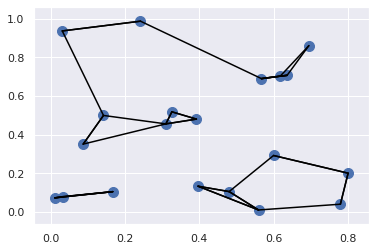

In [86]:
X = rng.rand(20, 2)
diff = X[:,np.newaxis,:] - X[np.newaxis,:,:]
print(X[:,np.newaxis,:].shape)
print(X[np.newaxis,:,:].shape)
dist_sq = np.sum(diff**2, axis=-1)
print(dist_sq.shape)
print(dist_sq.diagonal())

nearest = np.argsort(dist_sq, axis=1)
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')